In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

3205
2380


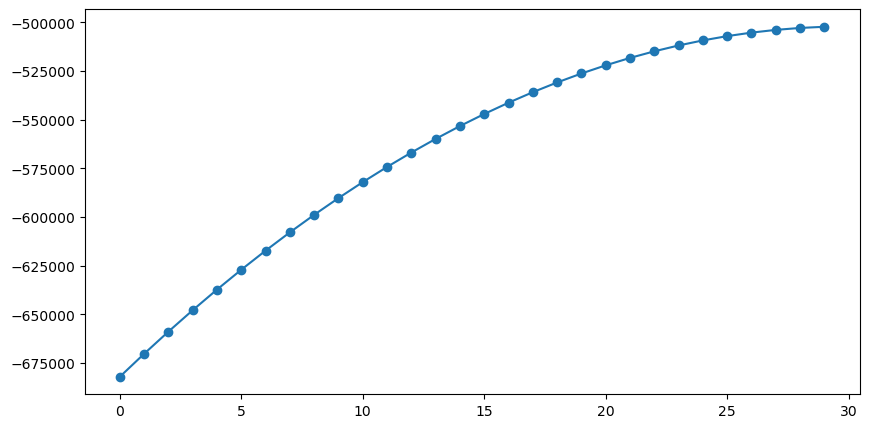

[-843000. -821200. -799800. ...  799800.  821200.  843000.]
(3235, 2490)


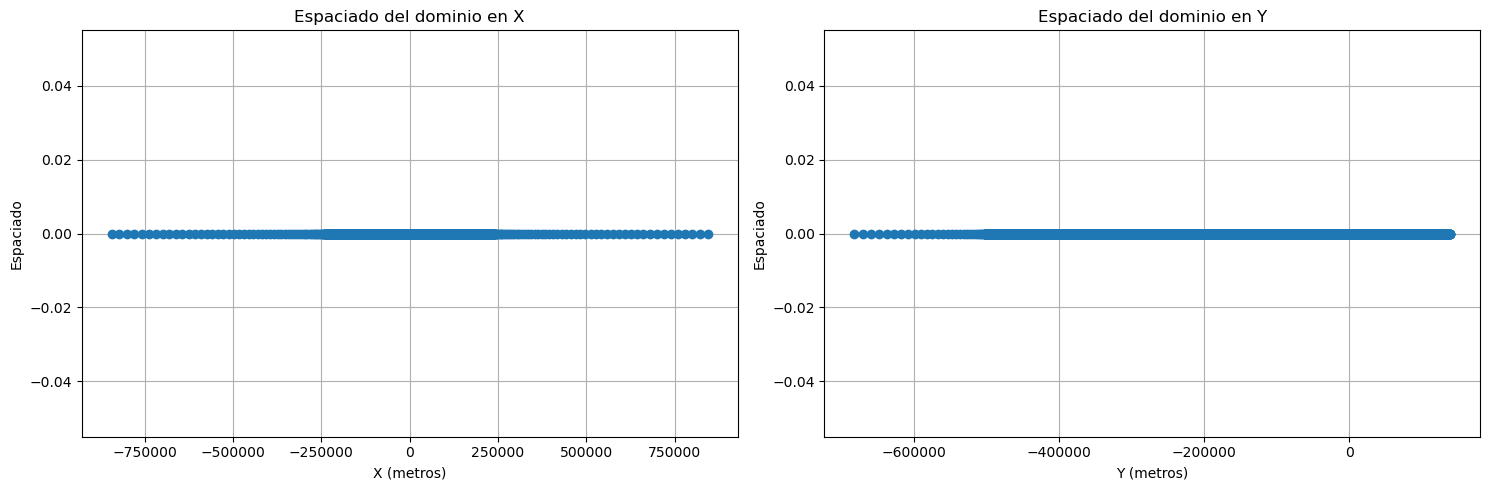

In [28]:
# Parámetros
h1 = 164 
L = 119000 # m original 119000
L_FIJADO = 11900
Z_max = -1493 - 164 # Profundidad en Y = -62000
Y_fondo= -62000
Fondo_lineal= -440000
Costa_extra= 20000
L_expansion = 2 * L
DelX = 200
DelY = 200#m
# Calcular nx y ny como enteros
nx_center = int(4 * L / DelX)
ny = int((L + Costa_extra + np.abs(Y_fondo)+ np.abs(Fondo_lineal)) / DelY) #L+ Talud continental +Expansión dominio Y
idx_start_slope=int(440000/DelY)
print(ny)
print(nx_center)

# %%
x_min_center = -L_expansion # m
x_max_center =  L_expansion # m
x_min_expand = - 800E3 # m
x_max_expand =  800E3 # m
y_min = -int(np.abs(Y_fondo)+ 440000) # m
y_max = int(119000 + 800) # m
ny_expand= 30

# Crear dominios en las regiones exteriores (-800E3 a -2L y 2L a 800E3) con crecimiento cuadrático
# Aseguramos que el primer incremento sea 200 m usando un factor adecuado 'k'.
k = DelX 

# Crear el vector para la expansión en Y
i_values_y =  np.arange(ny_expand+1)
# Crear el vector para la expansión del lado derecho 
#i_values_x = np.arange(int(np.sqrt((x_max_expand - x_max_center) / k)) + 1)
i_values_x =  np.arange(56)

x_right = x_max_center + (k * i_values_x**2)
y_expand = y_min -(k*i_values_y**2)

# Crear el vector para la expansión del lado izquierdo al reflejar y ordenar
x_left = -np.flip(x_right)
y_expand = np.flip(y_expand) 

# Quitar los valores que se superponen con el centro
x_left = x_left[:-1]
x_right = x_right[1:]
y_expand = y_expand[:-1]
dx_expand = x_right[1:]-x_right[:-1]
dy_expand = y_expand[1:]-y_expand[:-1]

# %%
len(x_right)

# %%

plt.figure(figsize=(10, 5))
plt.plot(y_expand[:], 'o-')
plt.show()

# %%

# Crear el dominio con un aumento lineal del delta x hacia los lados
x_center = np.linspace(-L_expansion, L_expansion, nx_center)  # Parte central de la bahía, con espaciado uniforme



# %%
# Crear el dominio Y (como antes, con espaciado uniforme)
y_center = np.linspace(Y_fondo + Fondo_lineal, L+Costa_extra, ny)

# Combinar las regiones para formar el dominio completo en Y
y_domain = np.concatenate((y_expand, y_center))



# Combinar todas las regiones para formar el dominio completo en X
x_domain = np.concatenate((x_left, x_center, x_right))


# Imprimir el dominio X para revisión
print(x_domain)

# %%
# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Espaciado en el eje X
ax1.plot(x_domain, np.zeros_like(x_domain), 'o-')
ax1.set_title("Espaciado del dominio en X")
ax1.set_xlabel("X (metros)")
ax1.set_ylabel("Espaciado")
ax1.grid(True)

# Subplot 2: Espaciado en el eje Y
ax2.plot(y_domain, np.zeros_like(y_domain), 'o-')
ax2.set_title("Espaciado del dominio en Y")
ax2.set_xlabel("Y (metros)")
ax2.set_ylabel("Espaciado")
ax2.grid(True)

# Mostrar el gráfico
plt.tight_layout()

# %%

# Crear el dominio Y (como antes, con espaciado uniforme)
#y_domain = np.linspace(Y_fondo, 3*L, ny)
X_domain, Y_domain = np.meshgrid(x_domain, y_domain)
Z_domain = np.zeros_like(X_domain)  # Inicializar Z con ceros
print(Z_domain.shape)


In [29]:
print(Z_domain.shape)
print(len(x_domain))
print(max(x_domain))
print(min(x_domain))
print(len(y_domain))
print(max(y_domain))
print(min(y_domain))
print(' Para x_left len es :',len(x_left), ', max=', max(x_left), ', min=', min(x_left))
print(' Para y_right len es :',len(x_right), ', max=', max(x_right), ', min=', min(x_right))
print(' Para x_center len es :',len(x_center), ', max=', max(x_center), ', min=', min(x_center))
print(' Para y_center len es :',len(y_center), ', max=', max(y_center), ', min=', min(y_center))
print(' Para y_expand len es :',len(y_expand), ', max=', max(y_expand), ', min=', min(y_expand))


# %%


(3235, 2490)
2490
843000.0
-843000.0
3235
139000.0
-682000.0
 Para x_left len es : 55 , max= -238200 , min= -843000
 Para y_right len es : 55 , max= 843000 , min= 238200
 Para x_center len es : 2380 , max= 238000.0 , min= -238000.0
 Para y_center len es : 3205 , max= 139000.0 , min= -502000.0
 Para y_expand len es : 30 , max= -502200 , min= -682000


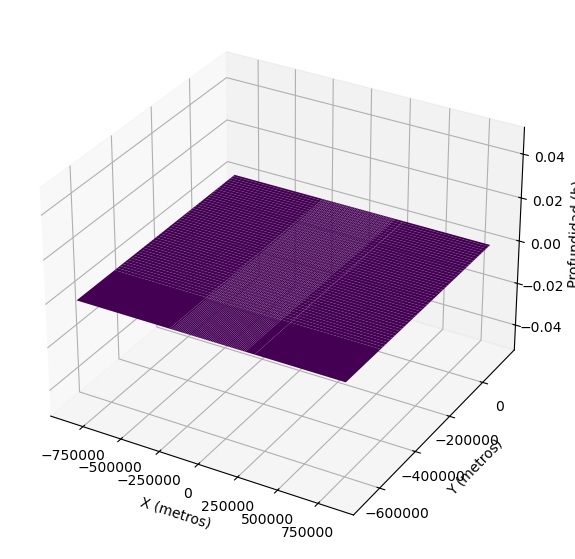

In [30]:
# Graficar el dominio
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Usar plot_surface para graficar la superficie
ax.plot_surface(X_domain, Y_domain, Z_domain, cmap='viridis')
#ax.plot(X[] color='red', linewidth=2)

# Etiquetas de los ejes
ax.set_xlabel('X (metros)')
ax.set_ylabel('Y (metros)')
ax.set_zlabel('Profundidad (h)')

plt.show()

In [31]:
#Idx_bahia_start=ny_expand+int(np.abs(Y_fondo + Fondo_lineal)/DelY)-1 #
#Idx_slope_start= ny_expand+int(np.abs(Fondo_lineal)/DelY)-1 #y_domain[Idx_slope_start]=-62058.4942084942

(59, 119)


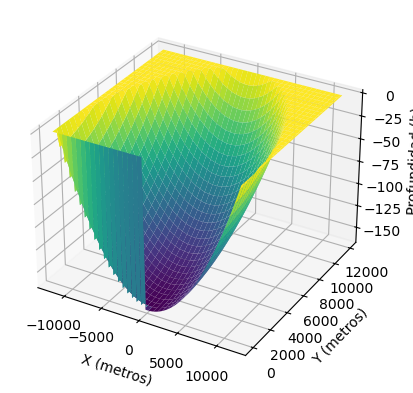

In [32]:
# Parámetros para la bahía
nr=int(L_FIJADO/DelY)
r = np.linspace(0, L_FIJADO, nr)  # Intervalo de r
theta = np.linspace(0, np.pi, 400)  # Intervalo angular para la revolución

# Definición de la función h(r) para la bahía
h_r = h1 * (1 - (r**2) / (L_FIJADO**2))

# Crear la malla de puntos para la bahía (en coordenadas polares)
R, Theta = np.meshgrid(r, theta)

# Convertir las coordenadas polares a cartesianas
X_bahia = R * np.cos(Theta)
Y_bahia = R * np.sin(Theta)

# Generar Z_bahia de acuerdo a la función h(r) en el dominio cartesiano
Z_bahia_polar = h1 * (1 - (R**2) / (L_FIJADO**2))

# Interpolamos los datos en el dominio cartesiano
# Crear una malla para interpolación más refinada
x_new = np.linspace(np.min(X_bahia), np.max(X_bahia), int(2*L_FIJADO/DelX)) #quiero que mida 2L
y_new = np.linspace(np.min(Y_bahia), np.max(Y_bahia),int(L_FIJADO/DelY))
X_new, Y_new = np.meshgrid(x_new, y_new)

# Puntos originales en coordenadas cartesianas
points = np.array([X_bahia.flatten(), Y_bahia.flatten()]).T
values = Z_bahia_polar.flatten()

# Interpolación en la nueva malla cartesiana
Z_bahia = -griddata(points, values, (X_new, Y_new), method='linear')
# Aplicar máscara para convertir NaN en 0
Z_bahia = np.nan_to_num(Z_bahia, nan=0)
print(Z_bahia.shape)

# Graficar la bahía interpolada en coordenadas cartesianas
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Usar plot_surface para graficar la superficie
#ax.plot_surface(X_new[:,0:200], Y_new[:,0:200], Z_new[:,0:200], cmap='viridis')
ax.plot_surface(X_new, Y_new, Z_bahia, cmap='viridis')
#ax.contourf(X_new, Y_new,Z_bahia, cmap='viridis')
# Etiquetas de los ejes
ax.set_xlabel('X (metros)')
ax.set_ylabel('Y (metros)')
ax.set_zlabel('Profundidad (h)')

# Save the plot as a PNG file
file_path = "bahia.png"
plt.savefig(file_path, dpi=300)

plt.show()

In [33]:
#Dimensiones de la bahía
# (59,119)

#Nuevos indices para la bahia L_FIJADO=11900

#Primero encontramos el indice de la mitad del dominio en X
X_idx_half=int(len(x_domain)/2)
# Encontramos los indices de inicio y fin de la bahía en X
X_idx_start_bahia=int(X_idx_half-int(L_FIJADO/DelX))
X_idx_end=int(X_idx_start_bahia+len(Z_bahia[0,:]))
print(X_idx_start_bahia-X_idx_end)

# Encontramos los indices de inicio y fin de la bahía en Y
Idx_bahia_start=ny_expand+int(np.abs(Y_fondo + Fondo_lineal)/DelY)-1 #
Idx_slope_start= ny_expand+int(np.abs(Fondo_lineal)/DelY)-1 #y_domain[Idx_slope_start]=-62058.4942084942
Y_idx_end_bahia= len(Z_bahia[:,0]) + Idx_bahia_start
print(Y_idx_end_bahia-Idx_bahia_start)


-119
59


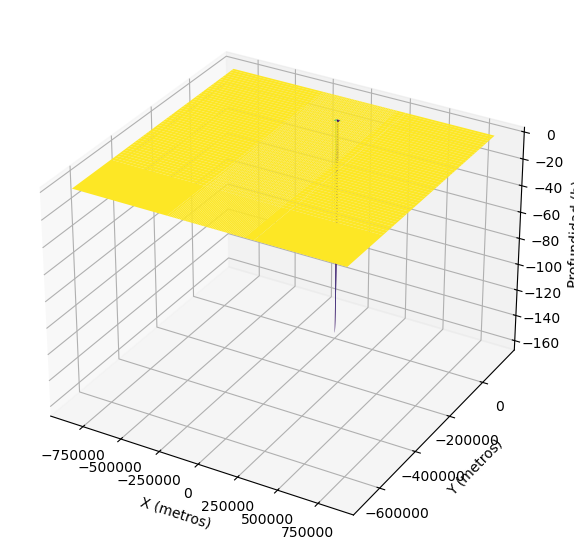

In [34]:
#---------------------------------------------------------
#Descomentar para caso sin L_FIJADO
#X_idx_start_bahia=int(L/DelX)+len(x_left) 
#X_idx_end = int(L/DelX) + len(x_new)+len(x_left)

#Y_idx_start_bahia= 311+890 #Y_domain[3100,0]=6.851585810589313
#Y_idx_end_bahia= len(Z_bahia[:,0]) + Idx_bahia_start
# %% 
#---------------------------------------------------------
# Asignar los valores de la bahía al dominio
Z_domain[Idx_bahia_start:Y_idx_end_bahia,X_idx_start_bahia:X_idx_end]= Z_bahia[:,:]

# Graficar el sólido de revolución
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Usar plot_surface para graficar la superficie
ax.plot_surface(X_domain, Y_domain, Z_domain, cmap='viridis')
#ax.plot(X[] color='red', linewidth=2)

# Etiquetas de los ejes
ax.set_xlabel('X (metros)')
ax.set_ylabel('Y (metros)')
ax.set_zlabel('Profundidad (h)')

plt.show()

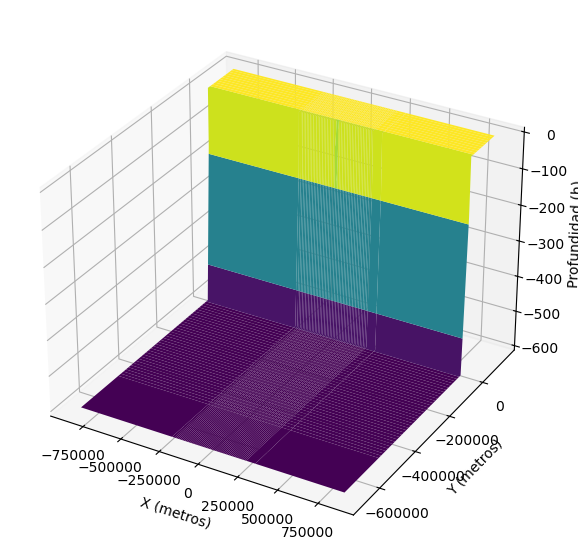

In [36]:
#Como cambiamos de la resolución de DelY de 20 a 200 m modificaremos el código
#Y_idx_start_bahia= 3110+8900 #Y_domain[3100,0]=6.851585810589313  a:
#Y_idx_start_bahia= 311+800 #Y_domain[3100,0]=6.851585810589313
#Y_idx_end_bahia= 

Z_domain[:Idx_slope_start+1,:]=-1000 #originalmente era -1000

# --- Agregar pendiente en la región Z[:Y_idx_start_bahia-1, :] ---
# Interpolar pendiente entre Z[0,:] = Z_max y Z[Y_idx_start_bahia-1,:] = -h1
Y_slope = np.linspace(Z_max, -h1, Idx_bahia_start+1-Idx_slope_start)


# Asignar la pendiente a toda la región en el eje X
Z_domain[Idx_slope_start:Idx_bahia_start+1, :] = np.tile(Y_slope[:, None], (1, len(x_domain)))


# Aplicar un filtro gaussiano para suavizar las transiciones
Z_smooth = gaussian_filter(Z_domain, sigma=5)

# Cortar a 1000 m de profundidad
Z_domain_crop = np.where(Z_smooth>=-600, Z_domain, -600)

# Graficar el sólido de revolución con la bahía y la pendiente
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Usar plot_surface para graficar la superficie
ax.plot_surface(X_domain, Y_domain, Z_domain_crop, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('X (metros)')
ax.set_ylabel('Y (metros)')
ax.set_zlabel('Profundidad (h)')

plt.show()

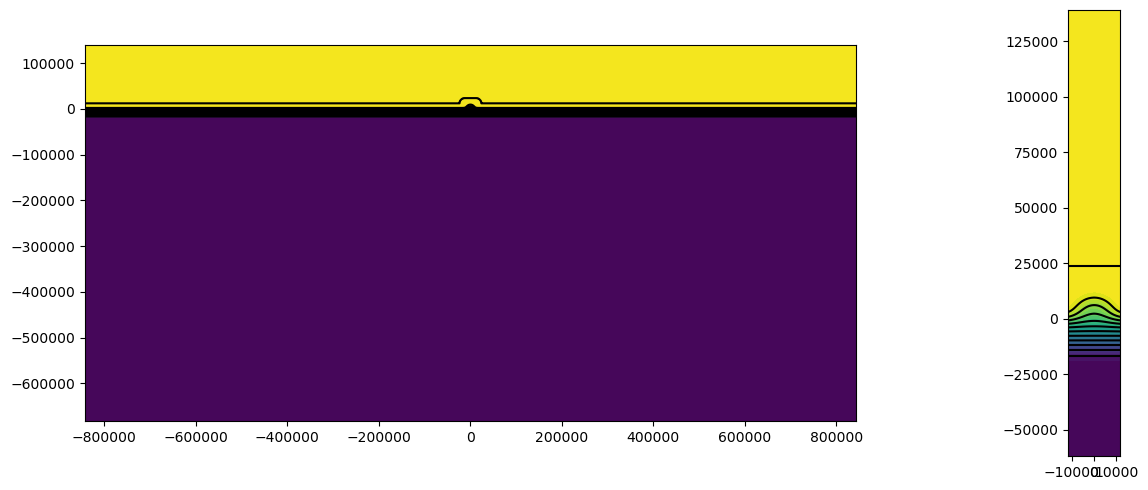

In [38]:

# Aplicar un filtro gaussiano para suavizar las transiciones
Z_smooth = gaussian_filter(Z_domain_crop, sigma=15)

# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Espaciado en el eje X
ax1.contourf(X_domain, 
            Y_domain,
            Z_smooth,33, cmap='viridis')
ax1.contour(X_domain, 
            Y_domain,
            -Z_smooth,levels=np.arange(0,1600,50),colors='k')

ax1.set_aspect(1)

# Subplot 2: Espaciado en el eje Y
ax2.contourf(X_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end], 
            Y_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end],
            Z_smooth[Idx_slope_start:,X_idx_start_bahia:X_idx_end],33, cmap='viridis')
ax2.contour(X_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end], 
            Y_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end],
            -Z_smooth[Idx_slope_start:,X_idx_start_bahia:X_idx_end],levels=np.arange(0,600,50),colors='k')

ax2.set_aspect(1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



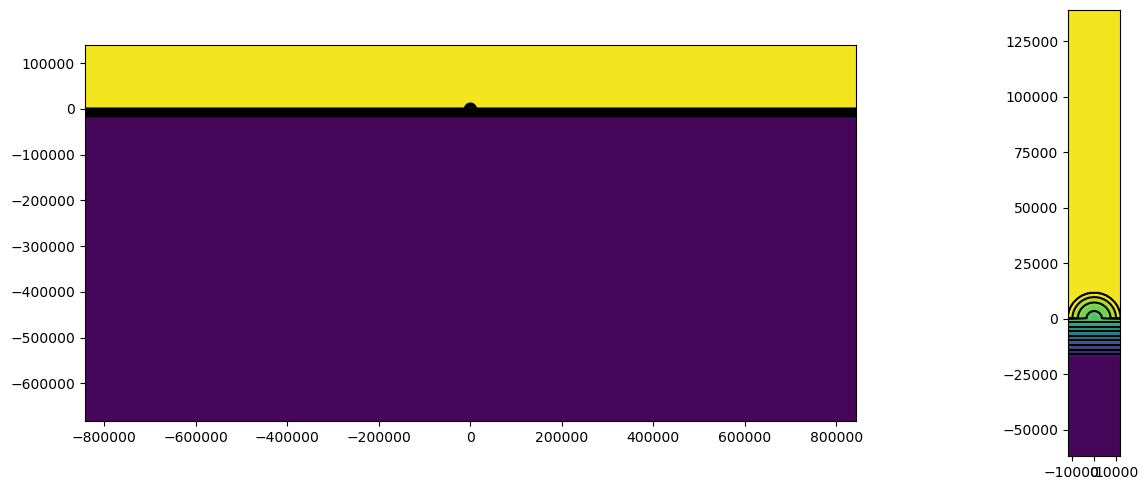

In [39]:
# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Espaciado en el eje X
ax1.contourf(X_domain, 
            Y_domain,
            Z_domain_crop,33, cmap='viridis')
ax1.contour(X_domain, 
            Y_domain,
            -Z_domain_crop,levels=np.arange(0,1600,50),colors='k')

ax1.set_aspect(1)

# Subplot 2: Espaciado en el eje Y
ax2.contourf(X_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end], 
            Y_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end],
            Z_domain_crop[Idx_slope_start:,X_idx_start_bahia:X_idx_end],33, cmap='viridis')
ax2.contour(X_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end], 
            Y_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end],
            -Z_domain_crop[Idx_slope_start:,X_idx_start_bahia:X_idx_end],levels=np.arange(0,1600,50),colors='k')

ax2.set_aspect(1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [106]:
# Cortar a 1000 m de profundidad
#Z_smooth_crop = np.where(Z_smooth>=-1000, Z_smooth, -1000)
#Z_domain_crop = np.where(Z_domain>=-1000, Z_domain, -1000)

#np.shape(Z_smooth_crop)

In [41]:
# Salvar versión con 10 veces menos puntos
X = X_domain#[::10,::10]
Y = Y_domain#[::130,::10]
Z = Z_domain_crop#[:10,::10]
Z_sm = Z_smooth#[::10,::10]

import netCDF4 as nc
import numpy as np

# Crear el archivo NetCDF
filename = 'bahia01_expand_bat.nc'
bahia = nc.Dataset(filename, 'w', format='NETCDF4')

# Definir las dimensiones
nx = X.shape[1]
ny = Y.shape[0]

bahia.createDimension('x', nx)
bahia.createDimension('y', ny)

# Crear las variables en el archivo NetCDF
x_var = bahia.createVariable('X', np.float32, ('y', 'x'))
y_var = bahia.createVariable('Y', np.float32, ('y', 'x'))
z_var = bahia.createVariable('Z', np.float32, ('y', 'x'))
z_smooth_var = bahia.createVariable('Z_sm', np.float32, ('y', 'x'))

# Agregar atributos a las variables (opcional)
x_var.units = 'meters'
y_var.units = 'meters'
z_var.units = 'meters'
z_smooth_var.units = 'meters'

x_var.description = 'Coordenadas X del dominio'
y_var.description = 'Coordenadas Y del dominio'
z_var.description = 'Datos de profundidad del dominio Z'
z_smooth_var.description = 'Datos suavizados de profundidad del dominio Z'

# Asignar los datos a las variables
x_var[:, :] = X
y_var[:, :] = Y
z_var[:, :] = Z
z_smooth_var[:, :] = Z_sm

# Cerrar el archivo para guardar los cambios
bahia.close()

print(f"Datos guardados exitosamente en {filename}")


Datos guardados exitosamente en bahia01_expand_bat.nc


In [95]:
total_depth = 600 # Profundidad total del dominio (originalmente 1000 m)
#nz = 40
nz = 50 # antes era 90
dz = np.zeros(nz)
dz[0] = 1 # m
factor = 1.081283 # Factor de crecimiento
for ii in range(1,nz):
    dz[ii] = dz[ii-1]*factor

600.0040271858109


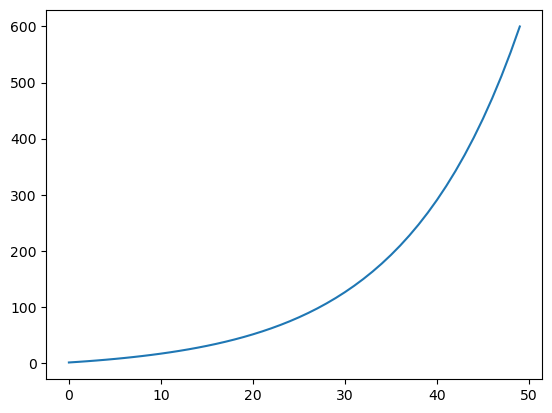

In [96]:
z_levels = np.cumsum(dz)
plt.plot(z_levels)
print(z_levels[-1])

In [97]:
# Copy this into data file
# These are the cell thicknesess - 164
zlevels_MIT = z_levels
zlevels_MIT[-1] = 600 # Make the last level be at H

for dzii, ii in zip(np.round(dz, decimals=1), range(len(dz))):
    print(f'{dzii},', end=" ")
    if ii!=0 and ii%9 == 0:
        print('')

1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 2.0, 
2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.5, 3.8, 4.1, 
4.4, 4.8, 5.2, 5.6, 6.0, 6.5, 7.1, 7.6, 8.2, 
8.9, 9.6, 10.4, 11.3, 12.2, 13.2, 14.3, 15.4, 16.7, 
18.0, 19.5, 21.1, 22.8, 24.6, 26.6, 28.8, 31.1, 33.7, 
36.4, 39.4, 42.6, 46.0, 

In [92]:
np.sum(np.round([1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 2.0, 
2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.5, 3.8, 4.1, 
4.4, 4.8, 5.2, 5.6, 6.0, 6.5, 7.1, 7.6, 8.2, 
8.9, 9.6, 10.4, 11.3, 12.2, 13.2, 14.3, 15.4, 16.7, 
18.0, 19.5, 21.1, 22.8, 24.6, 26.6, 28.8, 31.1, 33.7, 
36.4, 39.4, 42.6, 46.0], decimals=1))

600.3

Since its fit into 1000 m, the text under can be ignore. And lets proceed to copy array into data namelist, delR
Remove 0.1 m from last two levels to make it fit into 1000 m

In [98]:
dz[-2]=dz[-2]-0.1
dz[-3]=dz[-3]-0.1
dz[-1]=dz[-1]-0.2

np.cumsum(np.round(dz, decimals=1))

array([  1. ,   2.1,   3.3,   4.6,   6. ,   7.5,   9.1,  10.8,  12.7,
        14.7,  16.9,  19.3,  21.9,  24.7,  27.7,  30.9,  34.4,  38.2,
        42.3,  46.7,  51.5,  56.7,  62.3,  68.3,  74.8,  81.9,  89.5,
        97.7, 106.6, 116.2, 126.6, 137.9, 150.1, 163.3, 177.6, 193. ,
       209.7, 227.7, 247.2, 268.3, 291.1, 315.7, 342.3, 371.1, 402.2,
       435.9, 472.3, 511.6, 554.1, 599.9])

In [100]:
for dzii, ii in zip(np.round(dz, decimals=1), range(len(dz))):
    print(f'{dzii},', end=" ")
    if ii!=0 and ii%8 == 0:
        print('')

1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 
2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.5, 
3.8, 4.1, 4.4, 4.8, 5.2, 5.6, 6.0, 6.5, 
7.1, 7.6, 8.2, 8.9, 9.6, 10.4, 11.3, 12.2, 
13.2, 14.3, 15.4, 16.7, 18.0, 19.5, 21.1, 22.8, 
24.6, 26.6, 28.8, 31.1, 33.7, 36.4, 39.3, 42.5, 
45.8, 

Copy this array into mitgcm data namelist, variable delR.

In [114]:
delR=([1.0, 1.0, 1.1, 1.1, 1.2, 1.2, 1.3, 1.3, 1.4, 
1.5, 1.5, 1.6, 1.7, 1.7, 1.8, 1.9, 2.0, 
2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 
2.9, 3.0, 3.1, 3.2, 3.4, 3.5, 3.7, 3.8, 
4.0, 4.2, 4.4, 4.5, 4.7, 4.9, 5.2, 5.4, 
5.6, 5.8, 6.1, 6.4, 6.6, 6.9, 7.2, 7.5, 
7.8, 8.2, 8.5, 8.9, 9.3, 9.7, 10.1, 10.5, 
11.0, 11.4, 11.9, 12.5, 13.0, 13.5, 14.1, 14.7, 
15.4, 16.0, 16.7, 17.4, 18.2, 19.0, 19.8, 20.6, 
21.5, 22.4, 23.4, 24.4, 25.4, 26.5, 27.7, 28.9, 
30.1, 31.4, 32.7, 34.2, 35.6, 37.1, 38.7, 40.5, 
42.2])
print(len(delR))
print(np.sum(delR))

90
1000.0
